<h1><center><strong>Feature Scaling IN___D</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Standard Scaling](#Section2)<br><br>
3. [Min-Max Scaling](#Section3)<br><br>
4. [Robust Scaling](#Section4)<br><br>
5. [MaxAbs Scaling](#Section5)<br><br>
6. [Normalizing](#Section6)

<a id = Section1></a>
### **1. Introduction**

- **Standardization**, a type of **feature scaling**, involves **rescaling** the **features** such that they have the **properties** of a **standard normal distribution** with a **mean** of **zero** and a **standard deviation** of **one**.

<br> 

- **Need** of **Feature Scaling**:

  - Our **preprocessed data** may **contain attributes** with a **mixtures** of **scales** for **various quantities** such as dollars, kilograms and sales volume.

  - Many **machine learning methods expect** or are **more effective** if the **data attributes** have the **same scale**.

  - Hence, **feature scaling** can be an **important** preprocessing step for many machine learning algorithms.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<a id = Section2></a>
### **2. Standard Scaling**

- The `StandardScaler` **assumes** your **data** is **normally distributed within each feature** and will **scale them** such that the **distribution** is now **centred around 0**, with a **standard deviation of 1**.

- If **data** is **not normally distributed**, this is **not** the **best scaler** to use.

- ### $x_{scaled} = \dfrac{x_i – mean(x)}{stdev(x)}$

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(1)

In [4]:
df = pd.DataFrame({'x1': np.random.normal(0, 2, 10000),
                   'x2': np.random.normal(5, 3, 10000),
                   'x3': np.random.normal(-5, 5, 10000)})

In [5]:
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


- **Creating** the **StandardScaler** object and **fitting** it on our dataframe.

In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


- **Plotting** the features **before** and **after Standard Scaling**.

<AxesSubplot:title={'center':'After Standard Scaler'}, xlabel='x1', ylabel='Density'>

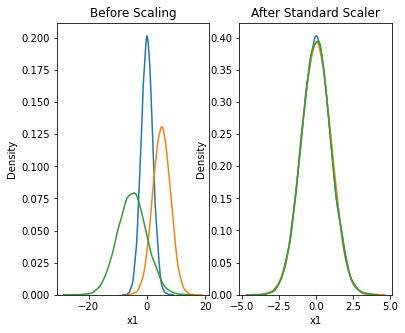

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

- **All features** are now on the **same scale** relative to one another.

<a id = Section3></a>
### **3. Min-Max Scaling**

- It essentially **shrinks** the **range** such that the range is now **between 0 and 1** (or **-1 to 1 if** there are **negative values**).

- This scaler **works better** for cases in which the standard scaler might not work so well, for example, **if** the **distribution** is **not Gaussian** or the **standard deviation** is **very small**.

- ### $x_{scaled} = \dfrac{x_i – min(x)}{max(x) – min(x)}$

- However, it is **sensitive to outliers**.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.DataFrame({# positive skew
                   'x1': np.random.chisquare(8, 1000),
                   # negative skew
                   'x2': np.random.beta(8, 2, 1000) * 40,
                   # no skew
                   'x3': np.random.normal(50, 3, 1000)})

In [11]:
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


- **Creating** the **MinMaxScaler** object and **fitting** it on our dataframe.

In [12]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [13]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
scaled_df.head()

,x1,x2,x3
0,0.320592,0.776009,0.748636
1,0.184702,0.971903,0.645125
2,0.761260,0.538834,0.458583
3,0.907357,0.715496,0.549570
4,0.426476,0.960240,0.504263


- **Plotting** the features **before** and **after Min-Max Scaling**.

<AxesSubplot:title={'center':'After Min-Max Scaling'}, xlabel='x1', ylabel='Density'>

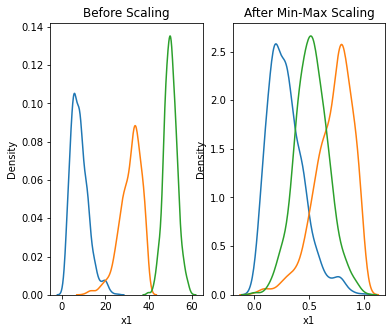

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

- The **skewness** of the **distribution** is **maintained** but the **3 distributions** are **brought** into the **same scale so** that they **overlap**.

<a id = Section4></a>
### **4. Robust Scaling**

- The RobustScaler uses a **similar method** to the **Min-Max scaler** but it instead uses the **interquartile range**, **rather** than the **min-max**, so that it is **robust to outliers**.

- Of course this means it is **using** the **less** of the **data for scaling** so it’s **more suitable** for **when** there are **outliers in** the **data**.

- ### $x_{scaled} = \dfrac{x_i – Q_2(x)}{Q_3(x) – Q_1(x)}$

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
x = pd.DataFrame({# Distribution with lower outliers
                  'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
                  # Distribution with higher outliers
                  'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),})

- **Creating** the **RobustScaler** object and **fitting** it on our dataframe.

In [17]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(x)

In [18]:
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])
robust_scaled_df.head()

,x1,x2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


- **Creating** the **MinMaxScaler** object and **fitting** it on our dataframe.

In [19]:
scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)

In [20]:
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])
minmax_scaled_df.head()

,x1,x2
0,0.922261,0.125539
1,0.888763,0.069703
2,0.888644,0.074662
3,0.781266,0.127279
4,0.892010,0.055246


- **Plotting** the features **before** and **after Scaling**.

<AxesSubplot:title={'center':'After Min-Max Scaling'}, xlabel='x1', ylabel='Density'>

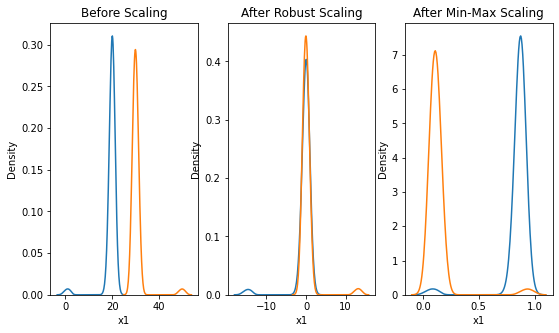

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)

- **After Robust scaling**, the **distributions** are **brought into** the **same scale and overlap**, but the **outliers** remain **outside** of **bulk** of the **new distributions**.

- However, **in Min-Max scaling**, the **two normal distributions** are kept **seperate by** the **outliers** that are **inside** the **0-1 range**.

<a id = Section5></a>
### **5. MaxAbs Scaling**

- It **scales** each feature by its **maximum absolute value**.

- This estimator **scales and translates** each feature individually such that the **maximal absolute value** of each feature in the **training set** will be **1.0**.

- The **absolute values** are **mapped** in the **range [0, 1]**.

- On **positive only data**, this scaler **behaves similarly** to **MinMaxScaler** and therefore also **suffers** from the **presence** of large **outliers**.


In [22]:
from sklearn.preprocessing import MaxAbsScaler

In [23]:
df = pd.DataFrame({'x1': np.random.chisquare(8, 1000),
                   'x2': np.random.beta(8, 2, 1000) * 40,
                   'x3': np.random.normal(50, 3, 1000)})

In [24]:
df.head()

,x1,x2,x3
0,15.486707,22.852118,49.555446
1,2.677518,33.867318,47.150287
2,4.690685,37.409593,48.482393
3,3.990793,36.927796,51.641221
4,12.037261,36.510997,48.469857


- **Creating** the **MaxAbsScaler** object and **fitting** it on our dataframe.

In [25]:
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df)

In [26]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
scaled_df.head()

,x1,x2,x3
0,0.652957,0.574492,0.834145
1,0.112891,0.851410,0.793660
2,0.197771,0.940461,0.816082
3,0.168261,0.928349,0.869253
4,0.507520,0.917871,0.815871


- **Plotting** the features **before** and **after Scaling**.

<AxesSubplot:title={'center':'After MaxAbs Scaling'}, xlabel='x1', ylabel='Density'>

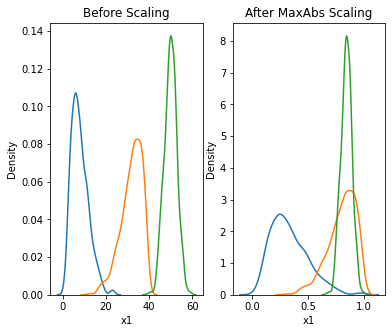

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After MaxAbs Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

- All the features have values **between 0** and **1**.

<a id = Section6></a>
### **6. Normalizing**

- The **normalizer scales** each value by d**ividing each value** by its **magnitude** in **n-dimensional space** for **n number of features**.

- Say your features were **x**, **y** and **z** Cartesian co-ordinates your scaled value for x would be:

- ### $x_{scaled} = \dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$

- **Each point** is now **within 1 unit** of the **origin** on this Cartesian coordinate system.

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
from sklearn.preprocessing import Normalizer

In [30]:
df = pd.DataFrame({'x1': np.random.randint(-100, 100, 1000).astype(float),
                   'y1': np.random.randint(-80, 80, 1000).astype(float),
                   'z1': np.random.randint(-150, 150, 1000).astype(float),})

- **Creating** the **Normalizer** object and **fitting** it on our dataframe.

In [31]:
scaler = Normalizer()
scaled_df = scaler.fit_transform(df)

In [32]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,x1,y1,z1
0,-0.339096,0.137081,-0.930711
1,0.466713,0.395520,0.791039
2,-0.737228,-0.560934,0.376627
3,0.447744,0.241093,0.861046
4,0.749512,-0.504774,-0.428293


- **Plotting** the values **before** and **after normalizing**.

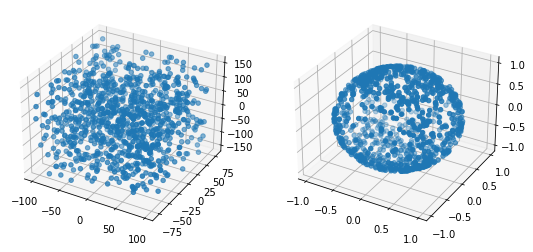

In [33]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

- The **points** are all **brought within a sphere** that is **at most 1 away from** the **origin** at any point.

- Also, the **axes** that were previously **different scales** are now **all one scale**.